# Introduction to Pandas

Pandas offers a lot of features and today's introduction is really 
just that - an introduction. 

I have taken a lot of material from the following sources: 
* https://github.com/jakevdp/PythonDataScienceHandbook
* https://github.com/wesm/pydata-book

which I highly recommend if you'd like to learn more about Pandas or about data science in general. Especially Jake Varnderplas. He has uploaded a wonderful series of videos about reproducible data analysis to youtube https://www.youtube.com/watch?v=_ZEWDGpM-vM. He's an astronomer/data scientist and runs a very informational and accessible blog http://jakevdp.github.io/ 

Now back to Pandas

What is it for?
* designed to __munge__ and __analyse__ data in a fast and easy way
* uses similar idiomatic style as numpy
* __numpy__ works best with _homogenous_ numerical _array_ data, while __pandas__ was designed for _tabular_ and _heterogenous_ data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Pandas Data Structures

## Series
- one-dimensional, array-like
- contains a sequence of values and an associated array of data labels
- more powerful version of a dictionary

In [2]:
# creating a series object
s1 = pd.Series([1,9,2,3])
print s1

0    1
1    9
2    2
3    3
dtype: int64


In [3]:
print "values: {}".format(s1.values)
print "index: {}".format(s1.index)

values: [1 9 2 3]
index: RangeIndex(start=0, stop=4, step=1)


In [4]:
# Creating a series object with a non-integer index
# nb: this index is explicit, if you don't specify it's called implicit index
s2 = pd.Series([1,9,2,3], index=['d','a','c','b'])
print s2
print "values: {}".format(s2.values)
print "index: {}".format(s2.index)

d    1
a    9
c    2
b    3
dtype: int64
values: [1 9 2 3]
index: Index([u'd', u'a', u'c', u'b'], dtype='object')


In [5]:
# or creating a series object with a non-integer index from a dictionary
dict_data = {'Star Wars': 8, 'Star Trek': 13, 'Matrix': 3, 'Blade Runner':2}
s3 = pd.Series(dict_data)
print s3

Blade Runner     2
Matrix           3
Star Trek       13
Star Wars        8
dtype: int64


In [6]:
# selecting single values
s1[0]

1

In [7]:
# selecting a set of values
s2[1:3]

a    9
c    2
dtype: int64

In [8]:
# selecting a set of values
s2[['a','b','c']]

a    9
b    3
c    2
dtype: int64

In [9]:
# indices are automatically aligned in arithmetic operations
# null values are inserted if an index is missing in one of the series
s3 = pd.Series([12,4,5,7], index=['b','c','d','e'])
print s2+s3

a     NaN
b    15.0
c     6.0
d     6.0
e     NaN
dtype: float64


In [10]:
# index can be named
s3.name = 'count'
s3.index.name = 'Movie'
print s3

Movie
b    12
c     4
d     5
e     7
Name: count, dtype: int64


### Indexing subtleties

In [23]:
s4 = pd.Series(['one', 'two', 'three'], index=[6, 2, 10])

In [13]:
# simple indexing will use explicit indices, i.e. index=[2, 6, 10]
s4[2]

'one'

In [14]:
# slicing will use the implicit indices,
s4[2:6]

10    three
dtype: object

To avoid running into trouble with this, pandas provides special functions.
The loc function to do __explict__ indexing

In [24]:
# to use the explicit index
s4.loc[2:6]

Series([], dtype: object)

But note: using slicing on the explicit index, the upper bound is *included*, unlike is usually the case in python and numpy!

And then there is the iloc function to do __implicit__ indexing

In [25]:
s4.iloc[1]

'two'

In [26]:
s4.iloc[1:3]

2       two
10    three
dtype: object

### Numpy-like operations

In [27]:
# selecting with a boolean array - masking
s2[s2>1]

a    9
c    2
b    3
dtype: int64

In [28]:
# scalar multiplication
s2 * 3

d     3
a    27
c     6
b     9
dtype: int64

In [29]:
# numpy functions
np.exp(s2)

d       2.718282
a    8103.083928
c       7.389056
b      20.085537
dtype: float64

## DataFrame
- table of data
- containing ordered collections of columns
- each column can have a different data
- can be thought of as a collection of Series
- has row and column index
- it's a bit like numpy arrays, but much more powerful and flexible

In [30]:
# create DataFrame from dictionary with multiple entries
data_dict = {'JD': [2458135.5, 2458135.5, 2458135.5, 2458140.5, 2458140.5, 2458140.5, 2458240.5, 2458240.5, 2458240.5],
             'object': ['A1689', 'A1689', 'A2218', 'A1689', 'A1689', 'A2218', 'A1689', 'A370', 'A2218'],
             'band': ['J', 'K', 'J', 'J', 'K', 'J', 'J', 'K', 'J']}
df1 = pd.DataFrame(data_dict)
df1

,JD,band,object
0,2458135.5,J,A1689
1,2458135.5,K,A1689
2,2458135.5,J,A2218
3,2458140.5,J,A1689
4,2458140.5,K,A1689
5,2458140.5,J,A2218
6,2458240.5,J,A1689
7,2458240.5,K,A370
8,2458240.5,J,A2218


In [31]:
df2 = pd.DataFrame(data_dict, index=['one', 'two', 'three','four','five','six','seven','eight','nine'])
df2

,JD,band,object
one,2458135.5,J,A1689
two,2458135.5,K,A1689
three,2458135.5,J,A2218
four,2458140.5,J,A1689
five,2458140.5,K,A1689
six,2458140.5,J,A2218
seven,2458240.5,J,A1689
eight,2458240.5,K,A370
nine,2458240.5,J,A2218


In [32]:
df1.head()

,JD,band,object
0,2458135.5,J,A1689
1,2458135.5,K,A1689
2,2458135.5,J,A2218
3,2458140.5,J,A1689
4,2458140.5,K,A1689


In [33]:
df1.columns

Index([u'JD', u'band', u'object'], dtype='object')

In [34]:
df1.JD

0    2458135.5
1    2458135.5
2    2458135.5
3    2458140.5
4    2458140.5
5    2458140.5
6    2458240.5
7    2458240.5
8    2458240.5
Name: JD, dtype: float64

In [35]:
# retrieve a row with explicit indexing
df2.loc['four']

JD        2.45814e+06
band                J
object          A1689
Name: four, dtype: object

In [36]:
# use implicit indexing
df2.iloc[:4,:3]

,JD,band,object
one,2458135.5,J,A1689
two,2458135.5,K,A1689
three,2458135.5,J,A2218
four,2458140.5,J,A1689


In [37]:
# add a column
df2['instrument'] = 'hawki'
df2

,JD,band,object,instrument
one,2458135.5,J,A1689,hawki
two,2458135.5,K,A1689,hawki
three,2458135.5,J,A2218,hawki
four,2458140.5,J,A1689,hawki
five,2458140.5,K,A1689,hawki
six,2458140.5,J,A2218,hawki
seven,2458240.5,J,A1689,hawki
eight,2458240.5,K,A370,hawki
nine,2458240.5,J,A2218,hawki


In [38]:
# add another column
df2['observer'] = pd.Series(['Lisa', 'Maggie', 'Marge'], index=['one', 'two', 'five']) 
df2

,JD,band,object,instrument,observer
one,2458135.5,J,A1689,hawki,Lisa
two,2458135.5,K,A1689,hawki,Maggie
three,2458135.5,J,A2218,hawki,NaN
four,2458140.5,J,A1689,hawki,NaN
five,2458140.5,K,A1689,hawki,Marge
six,2458140.5,J,A2218,hawki,NaN
seven,2458240.5,J,A1689,hawki,NaN
eight,2458240.5,K,A370,hawki,NaN
nine,2458240.5,J,A2218,hawki,NaN


In [39]:
# delete a column 
del df2['observer']
df2

,JD,band,object,instrument
one,2458135.5,J,A1689,hawki
two,2458135.5,K,A1689,hawki
three,2458135.5,J,A2218,hawki
four,2458140.5,J,A1689,hawki
five,2458140.5,K,A1689,hawki
six,2458140.5,J,A2218,hawki
seven,2458240.5,J,A1689,hawki
eight,2458240.5,K,A370,hawki
nine,2458240.5,J,A2218,hawki


In [40]:
# we can mask a dataframe just the same as a numpy array
df2.loc[df2.band == 'K']

,JD,band,object,instrument
two,2458135.5,K,A1689,hawki
five,2458140.5,K,A1689,hawki
eight,2458240.5,K,A370,hawki


In [46]:
# combining masking and indexing
# df2.loc[df2.band == 'K', ['JD', 'object']]
df2[df2.band == 'K'][['JD', 'object']]

,JD,object
two,2458135.5,A1689
five,2458140.5,A1689
eight,2458240.5,A370


In [42]:
# another way to add a column
df2['delta JD'] = df2['JD'] - df2.loc['one', 'JD']
# or with implicit indexing: 
# df2['delta JD'] = df2['JD'] - df2.iloc[0, 0]
df2

,JD,band,object,instrument,delta JD
one,2458135.5,J,A1689,hawki,0.0
two,2458135.5,K,A1689,hawki,0.0
three,2458135.5,J,A2218,hawki,0.0
four,2458140.5,J,A1689,hawki,5.0
five,2458140.5,K,A1689,hawki,5.0
six,2458140.5,J,A2218,hawki,5.0
seven,2458240.5,J,A1689,hawki,105.0
eight,2458240.5,K,A370,hawki,105.0
nine,2458240.5,J,A2218,hawki,105.0


In [47]:
# swap columns and rows
df2.T

,one,two,three,four,five,six,seven,eight,nine
JD,2.45814e+06,2.45814e+06,2.45814e+06,2.45814e+06,2.45814e+06,2.45814e+06,2.45824e+06,2.45824e+06,2.45824e+06
band,J,K,J,J,K,J,J,K,J
object,A1689,A1689,A2218,A1689,A1689,A2218,A1689,A370,A2218
instrument,hawki,hawki,hawki,hawki,hawki,hawki,hawki,hawki,hawki
delta JD,0,0,0,5,5,5,105,105,105


In [48]:
# return data as an ndarray
df2.values

array([[2458135.5, 'J', 'A1689', 'hawki', 0.0],
       [2458135.5, 'K', 'A1689', 'hawki', 0.0],
       [2458135.5, 'J', 'A2218', 'hawki', 0.0],
       [2458140.5, 'J', 'A1689', 'hawki', 5.0],
       [2458140.5, 'K', 'A1689', 'hawki', 5.0],
       [2458140.5, 'J', 'A2218', 'hawki', 5.0],
       [2458240.5, 'J', 'A1689', 'hawki', 105.0],
       [2458240.5, 'K', 'A370', 'hawki', 105.0],
       [2458240.5, 'J', 'A2218', 'hawki', 105.0]], dtype=object)

### Combining Data Frames - Index Alignment


In [49]:
table_1 = pd.DataFrame(np.arange(6).reshape(3,2), columns=list('bc'))
table_2 = pd.DataFrame(np.arange(15).reshape(5,3), columns=list('abc'))
print table_1
print table_2

   b  c
0  0  1
1  2  3
2  4  5
    a   b   c
0   0   1   2
1   3   4   5
2   6   7   8
3   9  10  11
4  12  13  14


In [50]:
table_1 + table_2

,a,b,c
0,NaN,1.0,3.0
1,NaN,6.0,8.0
2,NaN,11.0,13.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [51]:
# We can specify fill values for missing values
table_1.add(table_2, fill_value=100.)

,a,b,c
0,100.0,1.0,3.0
1,103.0,6.0,8.0
2,106.0,11.0,13.0
3,109.0,110.0,111.0
4,112.0,113.0,114.0


There is also: sub, div, mul, mod, pow, ...

## Missing Data
You can use either None or np.nan to indicate missing data

In [52]:
m = pd.Series([1, np.nan, 3, None, 5]) # pandas creates the series with type float!
m

0    1.0
1    NaN
2    3.0
3    NaN
4    5.0
dtype: float64

In [53]:
m[4] = None
m

0    1.0
1    NaN
2    3.0
3    NaN
4    NaN
dtype: float64

Find null values or discard them

In [54]:
m.isnull()


0    False
1     True
2    False
3     True
4     True
dtype: bool

In [63]:
m2 = m.dropna()

In [64]:
m2[1]

1    5.0
Name: 1, dtype: float64

In [57]:
# For data frames entire rows or columns will be dropped
# Here we drop all rows with nan's
m = pd.DataFrame([[1,      np.nan, 3],
                  [4,      5,      6],
                  [np.nan, 8,      9]])
m.dropna()

,0,1,2
1,4.0,5.0,6


In [60]:
# We can also drop columns which contain nan's
m = pd.DataFrame([[1,      np.nan, 3],
                  [4,      5,      6],
                  [np.nan, 8,      np.nan]])
print m
m.dropna(axis='columns')

     0    1    2
0  1.0  NaN  3.0
1  4.0  5.0  6.0
2  NaN  8.0  NaN


""
0
1
2


In [59]:
# We can be more specific when to drop a nan column/row
m = pd.DataFrame([[1,      np.nan, 3],
                  [4,      5,      6],
                  [np.nan, 8,      np.nan]])
m.dropna(axis='rows', thresh=2)

,0,1,2
0,1.0,NaN,3.0
1,4.0,5.0,6.0


We can also fill missing values with fillna()

## Merging 

Pandas can also simply merge different dataframes. The following is just a simple example and there are much more ways to join data frames (they work very much like database tables).

In [65]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [66]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [67]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [68]:
# now merge the two
pd.merge(df1,df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


## Aggregation and Grouping

- Split pandas objects into pieces (using one or more keys)
- Apply different types of operations on those pieces 
- combine the results of those operations into one object

<img src=https://github.com/jakevdp/PythonDataScienceHandbook/raw/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/figures/03.08-split-apply-combine.png>

In [69]:
# load the exoplanet data set shipped with seaborn
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [70]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [71]:
# compute the mean of each column (nan's are automatically dropped before the mean is calculated)
planets.mean()

number               1.785507
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
year              2009.070531
dtype: float64

In [72]:
# or we can get a summary statistic for each of the columns (again, nan's are dropped)
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


Other aggregation methods: count, median, min, max, std, var, prod, sum

## Group-by

This is where it starts to get interesting and fun.

In [73]:
# we can group data in a data frame by a key (can be more complex than this example)
# here we group the data by the method column
planets.groupby('method')

In [74]:
# for each of the methods, we can then calculate the median orbital period
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [75]:
# or just get some more stats
planets.groupby('method')['orbital_period'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,631.180000,544.217663,246.360000,438.770000,631.180000,823.590000,1016.000000
Eclipse Timing Variations,9.0,4751.644444,2499.130945,1916.250000,2900.000000,4343.500000,5767.000000,10220.000000
Imaging,12.0,118247.737500,213978.177277,4639.150000,8343.900000,27500.000000,94250.000000,730000.000000
Microlensing,7.0,3153.571429,1113.166333,1825.000000,2375.000000,3300.000000,3550.000000,5100.000000
Orbital Brightness Modulation,3.0,0.709307,0.725493,0.240104,0.291496,0.342887,0.943908,1.544929
Pulsar Timing,5.0,7343.021201,16313.265573,0.090706,25.262000,66.541900,98.211400,36525.000000
Pulsation Timing Variations,1.0,1170.000000,NaN,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
Radial Velocity,553.0,823.354680,1454.926210,0.736540,38.021000,360.200000,982.000000,17337.500000
Transit,397.0,21.102073,46.185893,0.355000,3.160630,5.714932,16.145700,331.600590


### Aggregate

We can specify different functions to be applied to all the columns at the same time

In [76]:
planets.groupby('method').aggregate(['count', 'min', max])

number         orbital_period               \
                               count min max          count          min   
method                                                                     
Astrometry                         2   1   1              2   246.360000   
Eclipse Timing Variations          9   1   2              9  1916.250000   
Imaging                           38   1   4             12  4639.150000   
Microlensing                      23   1   2              7  1825.000000   
Orbital Brightness Modulation      3   1   2              3     0.240104   
Pulsar Timing                      5   1   3              5     0.090706   
Pulsation Timing Variations        1   1   1              1  1170.000000   
Radial Velocity                  553   1   6            553     0.736540   
Transit                          397   1   7            397     0.355000   
Transit Timing Variations          4   2   3              3    22.339500   

                                              mass                distance  \
                                         max count     min    max    count   
method                                                                       
Astrometry                       1016.000000     0     NaN    NaN        2   
Eclipse Timing Variations       10220.000000     2  4.2000   6.05        4   
Imaging                        730000.000000     0     NaN    NaN       32   
Microlensing                     5100.000000     0     NaN    NaN       10   
Orbital Brightness Modulation       1.544929     0     NaN    NaN        2   
Pulsar Timing                   36525.000000     0     NaN    NaN        1   
Pulsation Timing Variations      1170.000000     0     NaN    NaN        0   
Radial Velocity                 17337.500000   510  0.0036  25.00      530   
Transit                           331.600590     1  1.4700   1.47      224   
Transit Timing Variations         160.000000     0     NaN    NaN        3   

                                                 year              
                                   min      max count   min   max  
method                                                             
Astrometry                       14.98    20.77     2  2010  2013  
Eclipse Timing Variations       130.72   500.00     9  2008  2012  
Imaging                           7.69   165.00    38  2004  2013  
Microlensing                   1760.00  7720.00    23  2004  2013  
Orbital Brightness Modulation  1180.00  1180.00     3  2011  2013  
Pulsar Timing                  1200.00  1200.00     5  1992  2011  
Pulsation Timing Variations        NaN      NaN     1  2007  2007  
Radial Velocity                   1.35   354.00   553  1989  2014  
Transit                          38.00  8500.00   397  2002  2014  
Transit Timing Variations       339.00  2119.00     4  2011  2014

We can do more than just use min, max,... and specify more then one function to be applied to each group:

In [77]:
planets.groupby('method')['mass', 'orbital_period'].aggregate(['count', 'min', np.median, max])

mass                       orbital_period  \
                              count     min median    max          count   
method                                                                     
Astrometry                        0     NaN    NaN    NaN              2   
Eclipse Timing Variations         2  4.2000  5.125   6.05              9   
Imaging                           0     NaN    NaN    NaN             12   
Microlensing                      0     NaN    NaN    NaN              7   
Orbital Brightness Modulation     0     NaN    NaN    NaN              3   
Pulsar Timing                     0     NaN    NaN    NaN              5   
Pulsation Timing Variations       0     NaN    NaN    NaN              1   
Radial Velocity                 510  0.0036  1.260  25.00            553   
Transit                           1  1.4700  1.470   1.47            397   
Transit Timing Variations         0     NaN    NaN    NaN              3   

                                                                         
                                       min        median            max  
method                                                                   
Astrometry                      246.360000    631.180000    1016.000000  
Eclipse Timing Variations      1916.250000   4343.500000   10220.000000  
Imaging                        4639.150000  27500.000000  730000.000000  
Microlensing                   1825.000000   3300.000000    5100.000000  
Orbital Brightness Modulation     0.240104      0.342887       1.544929  
Pulsar Timing                     0.090706     66.541900   36525.000000  
Pulsation Timing Variations    1170.000000   1170.000000    1170.000000  
Radial Velocity                   0.736540    360.200000   17337.500000  
Transit                           0.355000      5.714932     331.600590  
Transit Timing Variations        22.339500     57.011000     160.000000

But we can also get different statistics for different columns:

In [78]:
planets.groupby('method').aggregate({'orbital_period': ['count','min','max', 'mean'],
                             'mass': 'mean'})

orbital_period                              \
                                       count          min            max   
method                                                                     
Astrometry                                 2   246.360000    1016.000000   
Eclipse Timing Variations                  9  1916.250000   10220.000000   
Imaging                                   12  4639.150000  730000.000000   
Microlensing                               7  1825.000000    5100.000000   
Orbital Brightness Modulation              3     0.240104       1.544929   
Pulsar Timing                              5     0.090706   36525.000000   
Pulsation Timing Variations                1  1170.000000    1170.000000   
Radial Velocity                          553     0.736540   17337.500000   
Transit                                  397     0.355000     331.600590   
Transit Timing Variations                  3    22.339500     160.000000   

                                                  mass  
                                        mean      mean  
method                                                  
Astrometry                        631.180000       NaN  
Eclipse Timing Variations        4751.644444  5.125000  
Imaging                        118247.737500       NaN  
Microlensing                     3153.571429       NaN  
Orbital Brightness Modulation       0.709307       NaN  
Pulsar Timing                    7343.021201       NaN  
Pulsation Timing Variations      1170.000000       NaN  
Radial Velocity                   823.354680  2.630699  
Transit                            21.102073  1.470000  
Transit Timing Variations          79.783500       NaN

### Apply 

We can apply any function to groups as well.

For example, for each exoplanet detection method, we may want to select the top 3 planets with the longest orbital period.

In [79]:
def top(df, n=3, column='orbital_period'):
    return df.sort_values(by=column)[-n:]

In [80]:
# first drop all entries with nan values for the orbital period
# then group by detection method and apply our top function
planets.dropna(subset=['orbital_period']).groupby('method').apply(top)

method  number  \
method                                                                     
Astrometry                    113                     Astrometry       1   
                              537                     Astrometry       1   
Eclipse Timing Variations     37       Eclipse Timing Variations       2   
                              43       Eclipse Timing Variations       2   
                              32       Eclipse Timing Variations       1   
Imaging                       643                        Imaging       4   
                              68                         Imaging       1   
                              937                        Imaging       1   
Microlensing                  920                   Microlensing       1   
                              918                   Microlensing       1   
                              922                   Microlensing       2   
Orbital Brightness Modulation 787  Orbital Brightness Modulation       2   
                              788  Orbital Brightness Modulation       2   
                              792  Orbital Brightness Modulation       1   
Pulsar Timing                 942                  Pulsar Timing       3   
                              943                  Pulsar Timing       3   
                              944                  Pulsar Timing       1   
Pulsation Timing Variations   958    Pulsation Timing Variations       1   
Radial Velocity               625                Radial Velocity       2   
                              15                 Radial Velocity       3   
                              637                Radial Velocity       1   
Transit                       687                        Transit       1   
                              738                        Transit       2   
                              824                        Transit       7   
Transit Timing Variations     813      Transit Timing Variations       2   
                              736      Transit Timing Variations       2   
                              680      Transit Timing Variations       2   

                                   orbital_period  mass  distance  year  
method                                                                   
Astrometry                    113      246.360000   NaN     20.77  2013  
                              537     1016.000000   NaN     14.98  2010  
Eclipse Timing Variations     37      5767.000000   NaN    130.72  2008  
                              43      5840.000000   NaN       NaN  2011  
                              32     10220.000000  6.05       NaN  2009  
Imaging                       643   170000.000000   NaN     39.94  2008  
                              68    318280.000000   NaN      7.69  2008  
                              937   730000.000000   NaN       NaN  2006  
Microlensing                  920     3500.000000   NaN       NaN  2005  
                              918     3600.000000   NaN       NaN  2005  
                              922     5100.000000   NaN       NaN  2008  
Orbital Brightness Modulation 787        0.240104   NaN   1180.00  2011  
                              788        0.342887   NaN   1180.00  2011  
                              792        1.544929   NaN       NaN  2013  
Pulsar Timing                 942       66.541900   NaN       NaN  1992  
                              943       98.211400   NaN       NaN  1994  
                              944    36525.000000   NaN       NaN  2003  
Pulsation Timing Variations   958     1170.000000   NaN       NaN  2007  
Radial Velocity               625     9017.800000   NaN     44.80  2011  
                              15     14002.000000  1.64     14.08  2009  
                              637    17337.500000  9.00     23.98  2009  
Transit                       687      289.862300   NaN    190.00  2011  
                              738      303.137000   NaN   1500.00  2012  
   

### Filtering

We can also filter out data according to some function we specify.

object
blue     Axes(0.125,0.11;0.775x0.77)
green    Axes(0.125,0.11;0.775x0.77)
red      Axes(0.125,0.11;0.775x0.77)
Name: value, dtype: object

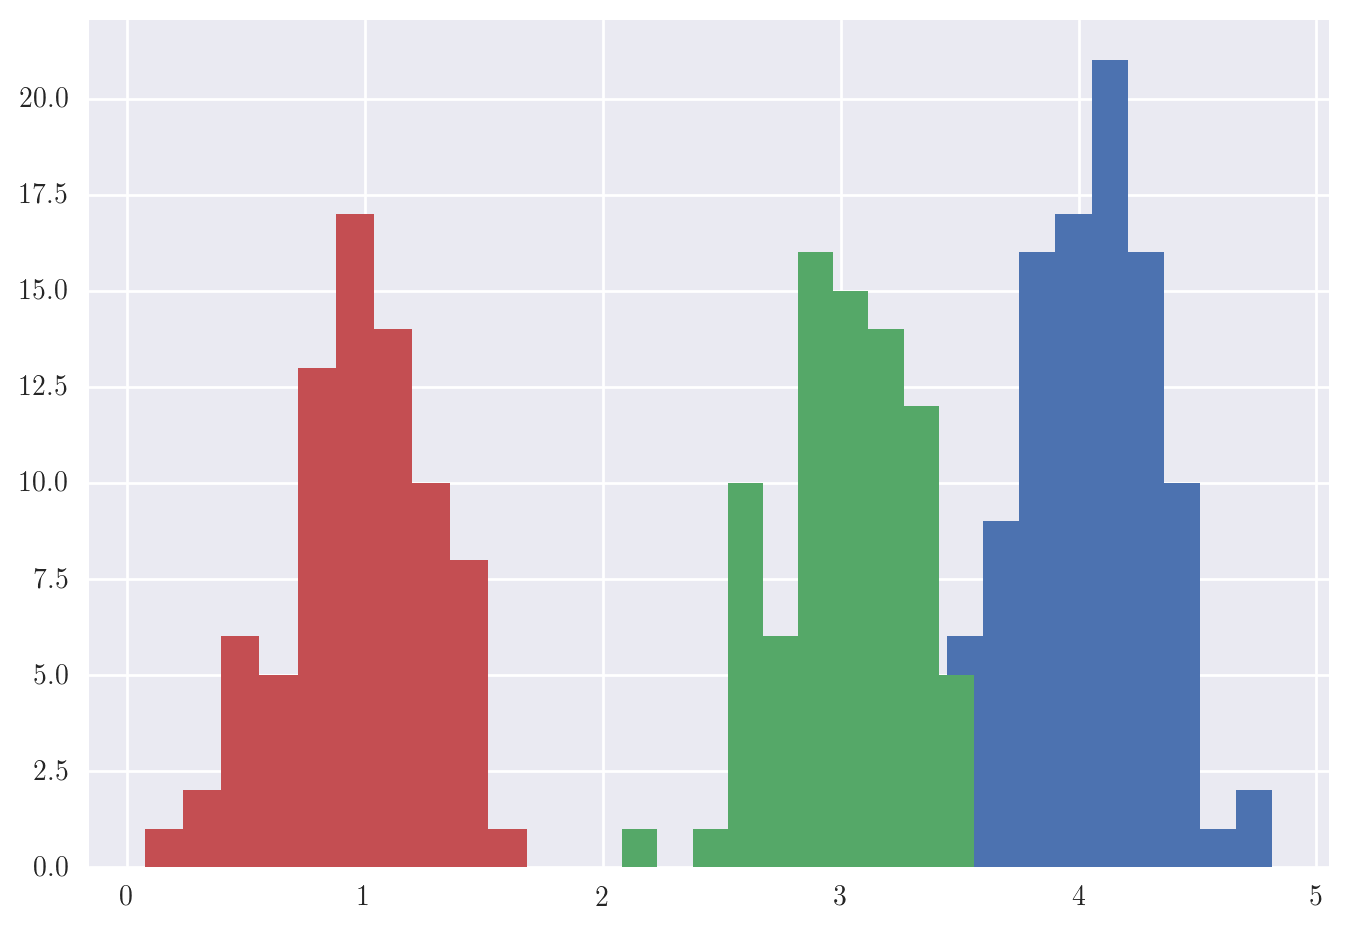

In [83]:
# First lets define some data. In this case 3 Gaussians
means = [1]*77 + [3]*80 + [4]*99
objects = ['red']*77 + ['green']*80 + ['blue']*99
errors = np.random.rand(len(means))*0.2 + 0.2 # errors are between 0.2 and 0.4
values = np.random.normal(means, errors)

data_dict = {'value': values, 'error': errors, 'object': objects}
df_gauss = pd.DataFrame(data_dict)
df_gauss.groupby('object')['value'].hist()


object
green    Axes(0.125,0.11;0.775x0.77)
red      Axes(0.125,0.11;0.775x0.77)
Name: value, dtype: object

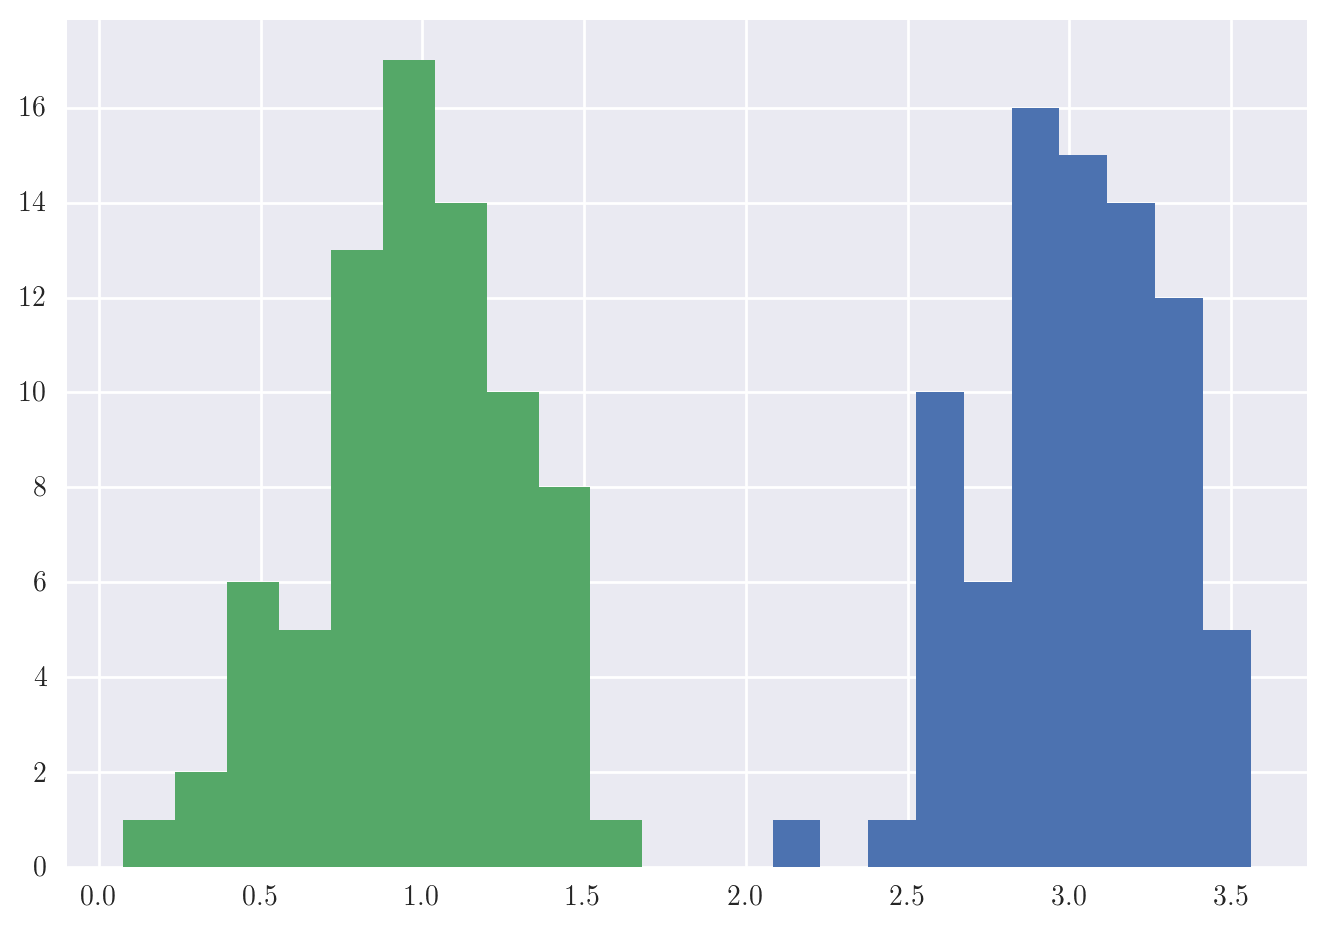

In [84]:
# now discard all Gaussians where the mean is above 3.5 
def my_filter(x):
    mean = x['value'].mean()
    return mean < 3.5
    
df_gauss_cut = df_gauss.groupby('object').filter(my_filter)
df_gauss_cut.groupby('object')['value'].hist()

### Transform

We can also apply a function to each value of a given group.

object
blue     Axes(0.125,0.11;0.775x0.77)
green    Axes(0.125,0.11;0.775x0.77)
red      Axes(0.125,0.11;0.775x0.77)
Name: normalized value, dtype: object

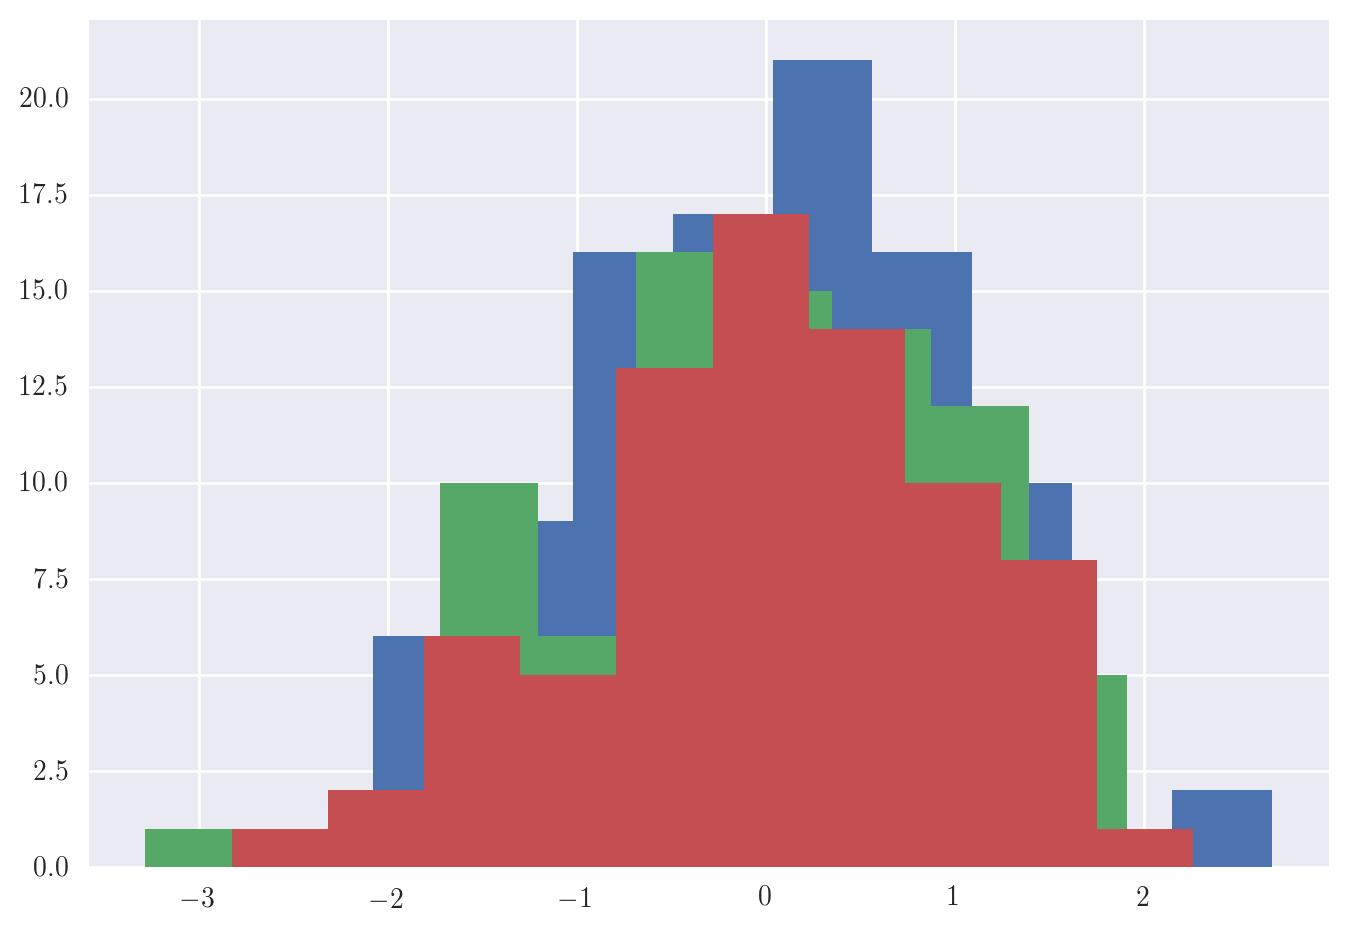

In [85]:
# let's normalize all our data, we need to do this for each Gaussian
df_gauss['normalized value'] = df_gauss.groupby('object')['value'].transform(lambda x: (x - x.mean())/x.std())
df_gauss.groupby('object')['normalized value'].hist()

### Different Group-By keys

We can have more complicated group-by selections as well

In [90]:
# group by detection method, as well as the decade in which the detection was made
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Time-Series Data

This section is following Jake Vaderplas' example quite closely. For more details check out https://github.com/jakevdp/PythonDataScienceHandbook/blob/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/03.11-Working-with-Time-Series.ipynb or - even better - his book https://github.com/jakevdp/PythonDataScienceHandbook

In [91]:
# read in the Seattle Fremont Bridge data - it counts bicylcles 
# going east/west. There is one data entry for each hour

# download if you dont have the data set yet
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


In [92]:
# the file contains a time stamp, as well as the number of persons going east and west
data.head(n=10)

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0
2012-10-03 05:00:00,21.0,10.0
2012-10-03 06:00:00,105.0,50.0
2012-10-03 07:00:00,257.0,95.0
2012-10-03 08:00:00,291.0,146.0


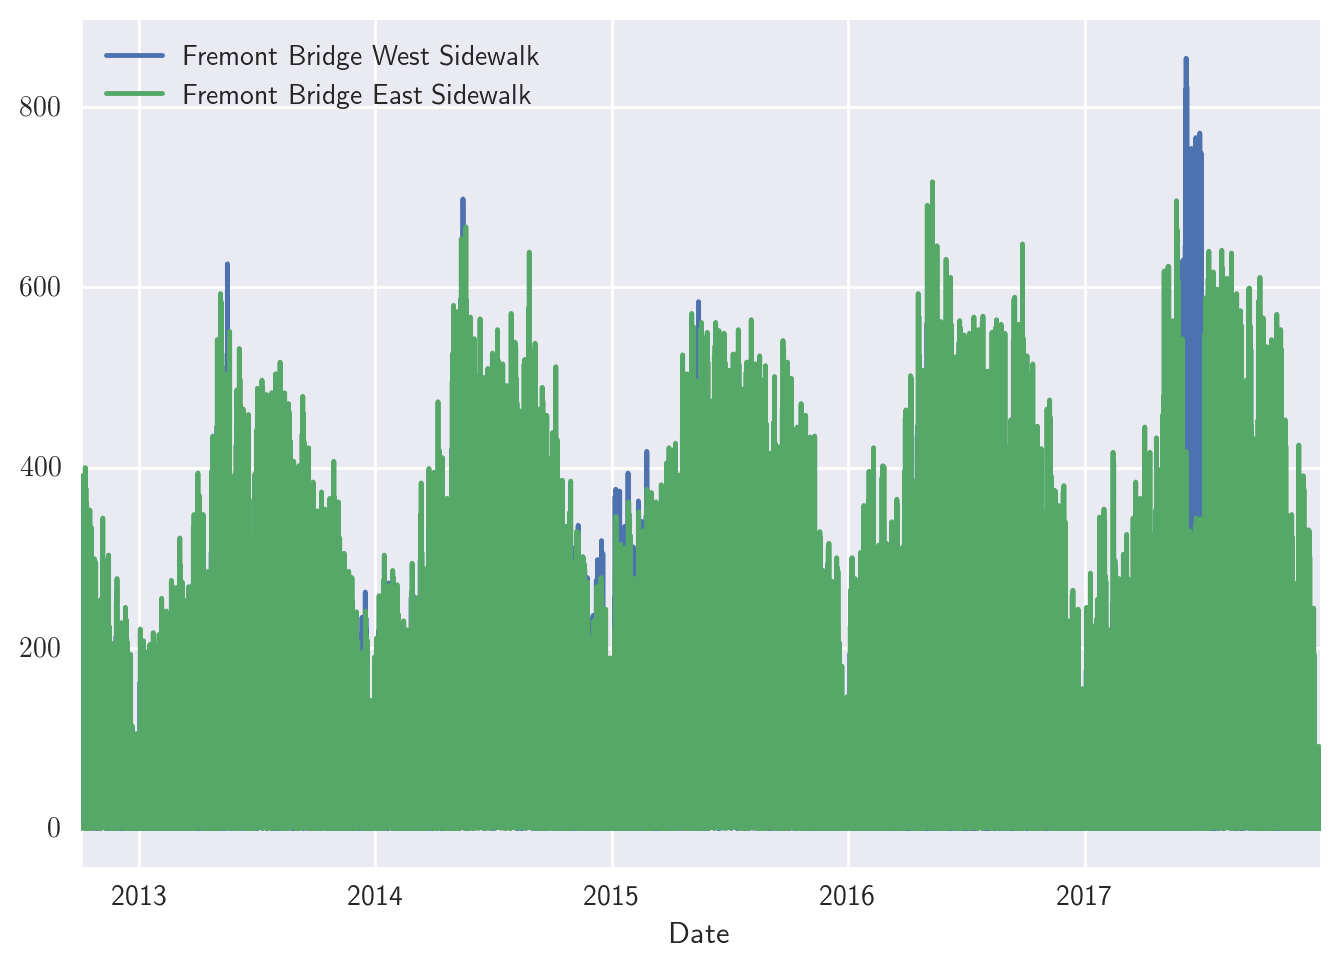

In [93]:
# let's take a look at the data as it is
data.plot()

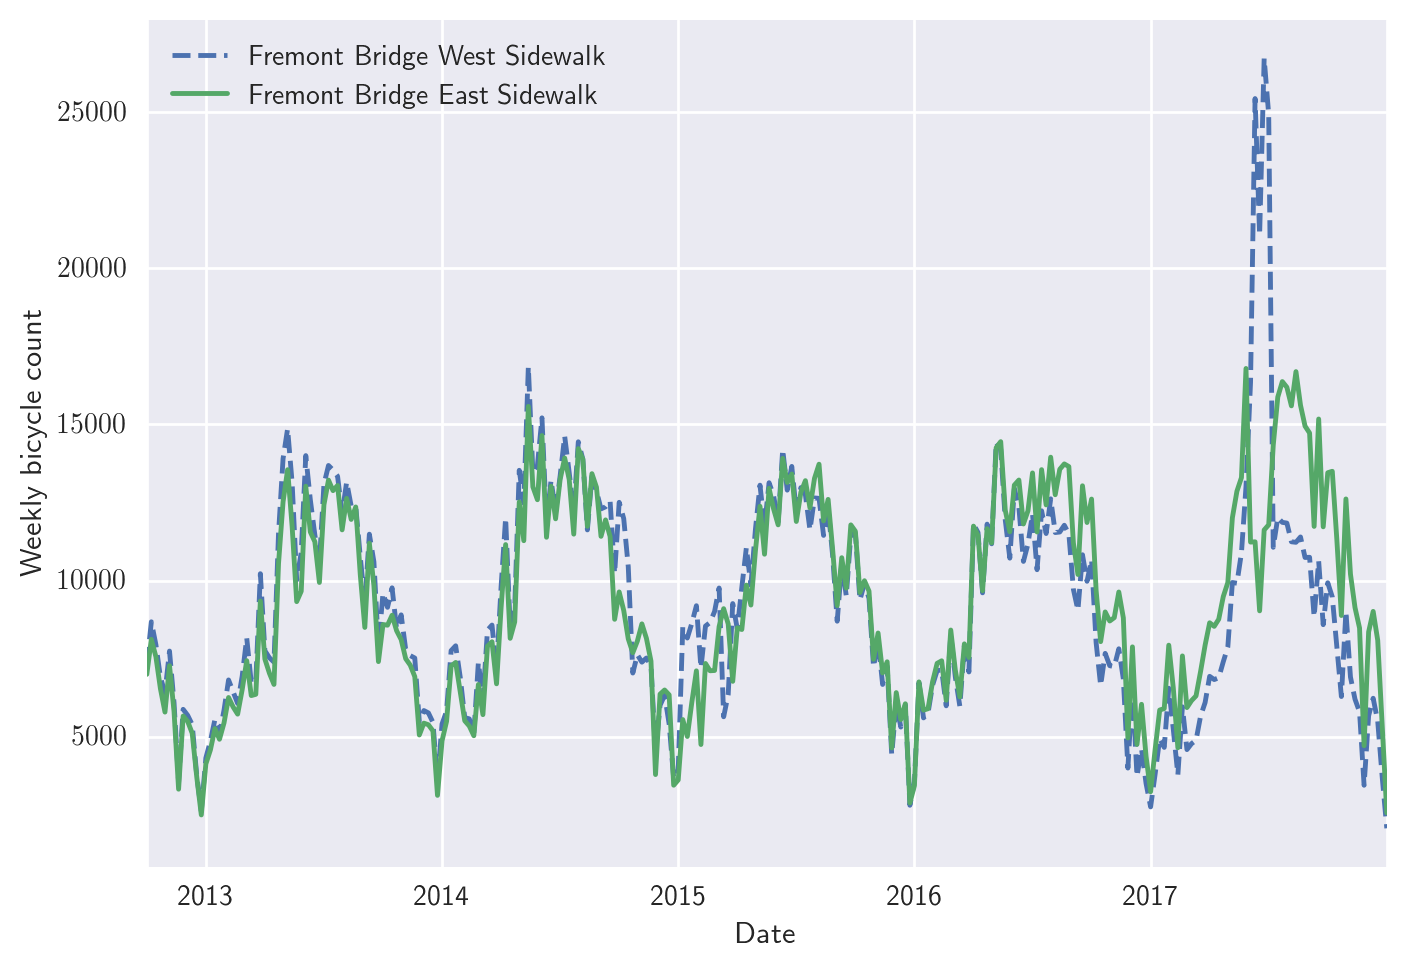

In [94]:
# for a slightly cleaner view
weekly = data.resample('W').sum() # 'W' is for weekly
weekly.plot(style=['--', '-'])
plt.ylabel('Weekly bicycle count');


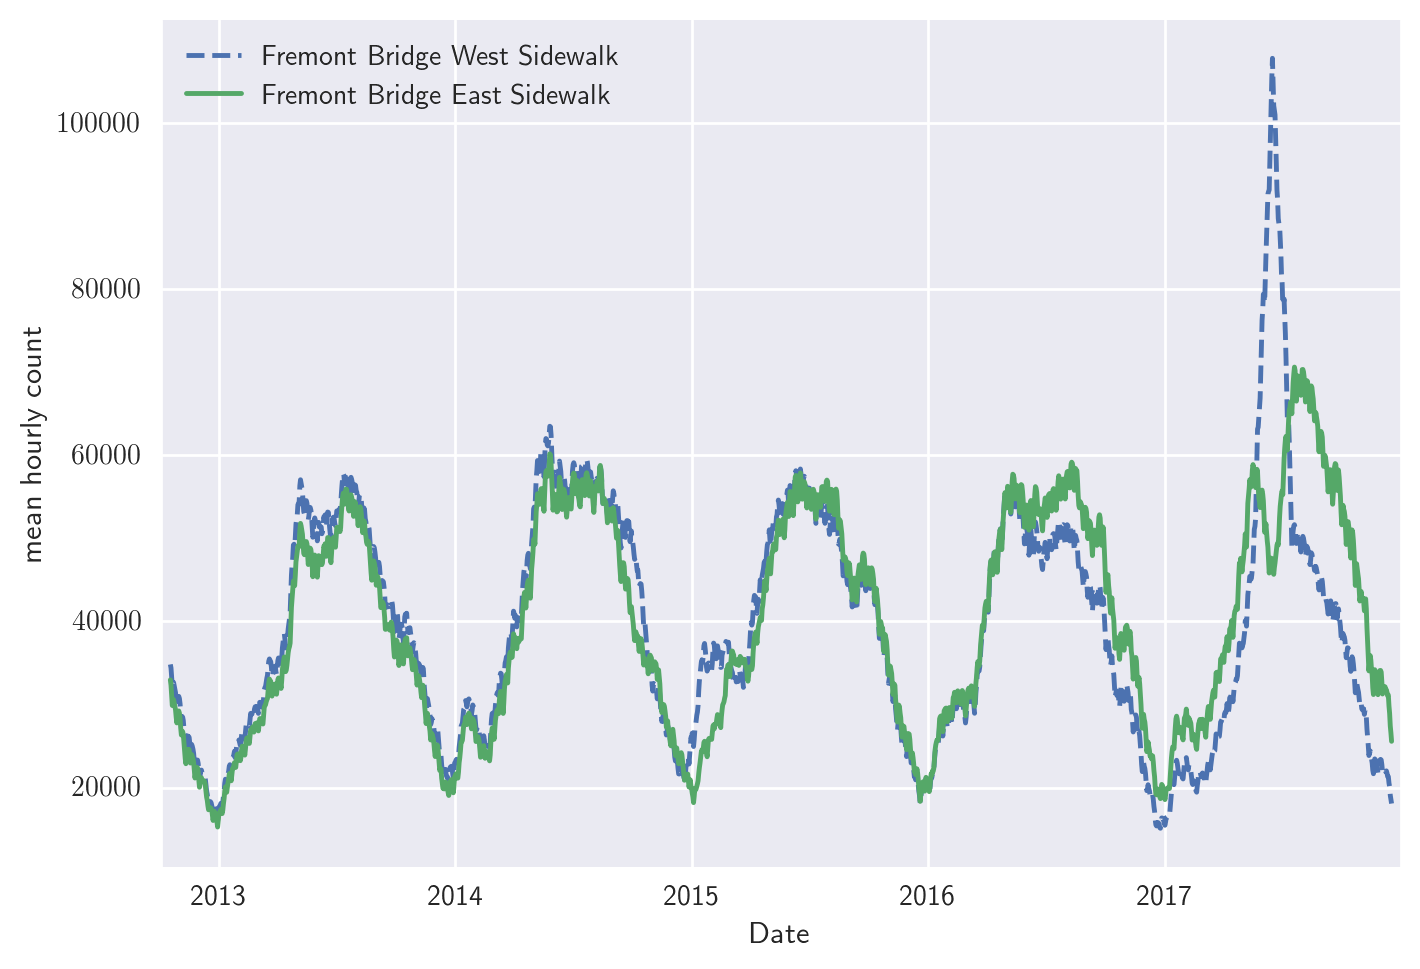

In [95]:
# it's still a bit noisy, maybe let's try a 30day rolling window
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['--', '-'])
plt.ylabel('mean hourly count');


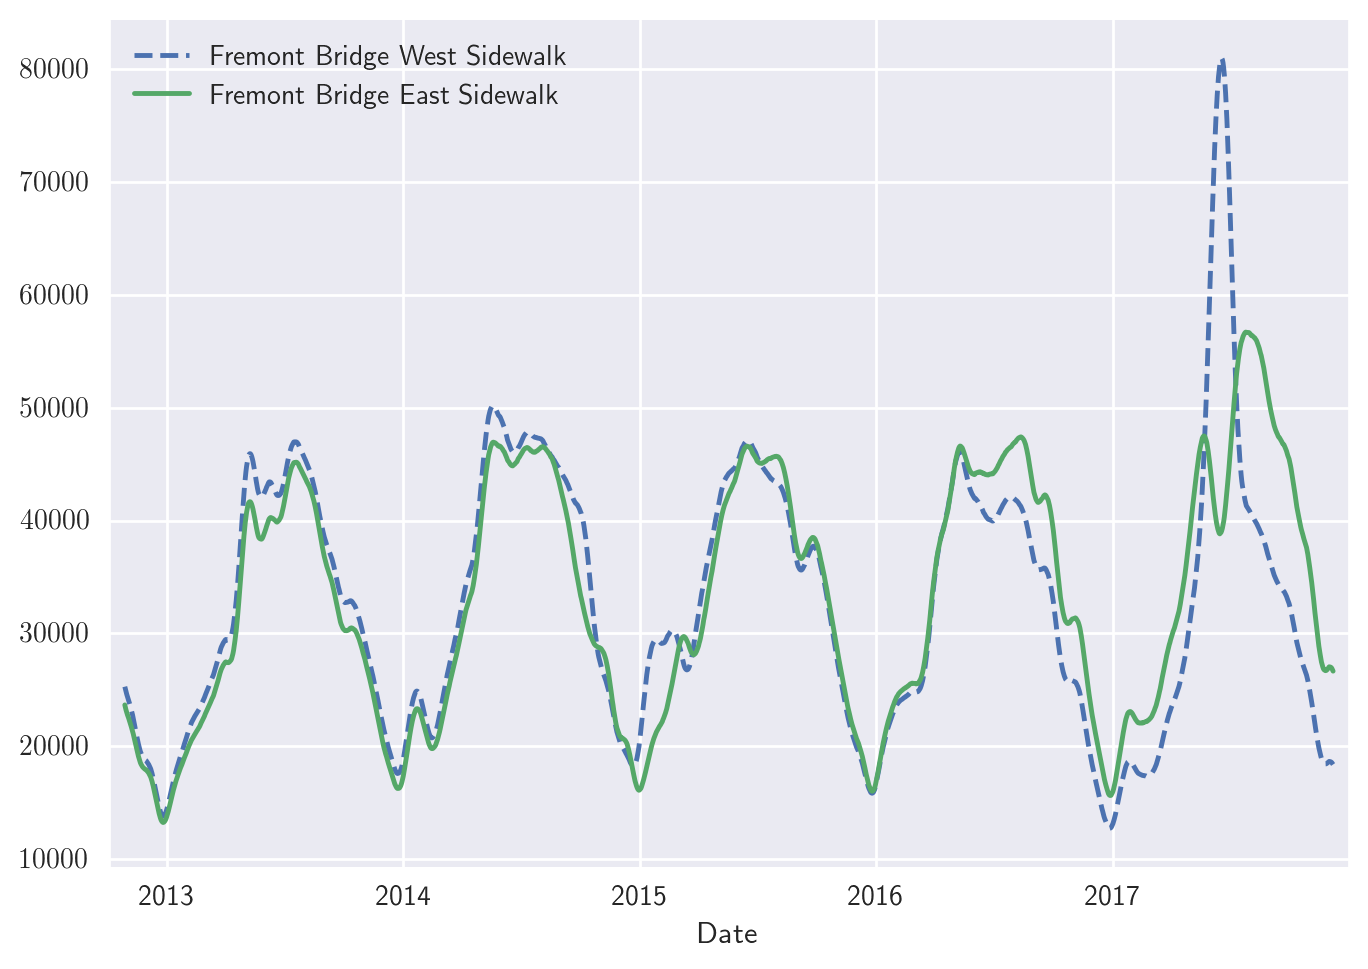

In [96]:
# still a bit wiggly, maybe use a larger window and use a Gaussian instead of a tophat
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=['--', '-']);


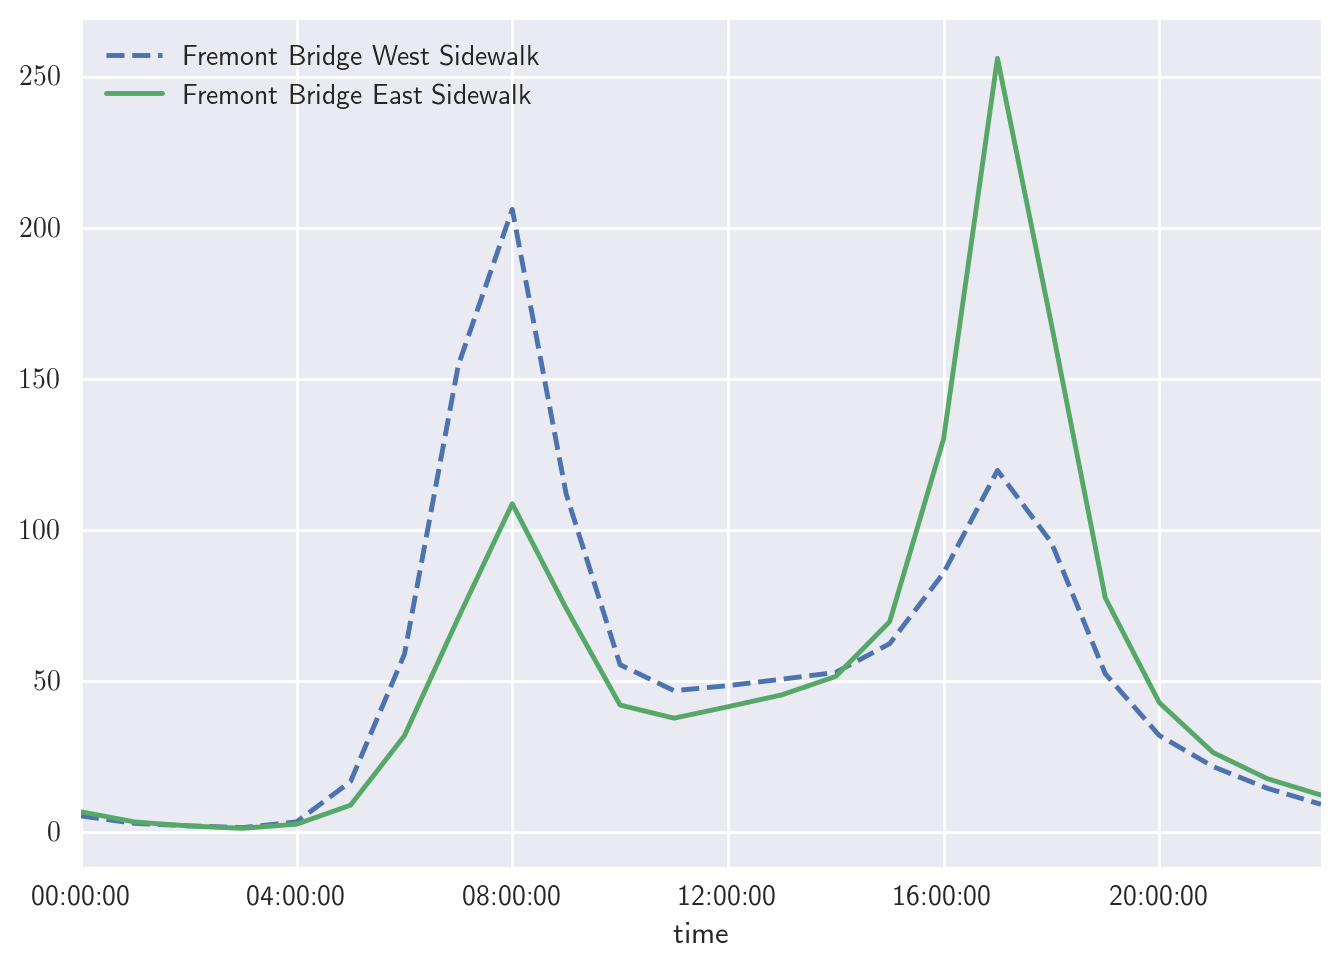

In [97]:
# let's see if there are any peaks during the day
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['--', '-']);


In [98]:
# we can also ask for the day of the week for each entry
data.index.weekday

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
           dtype='int64', name=u'Date', length=45984)

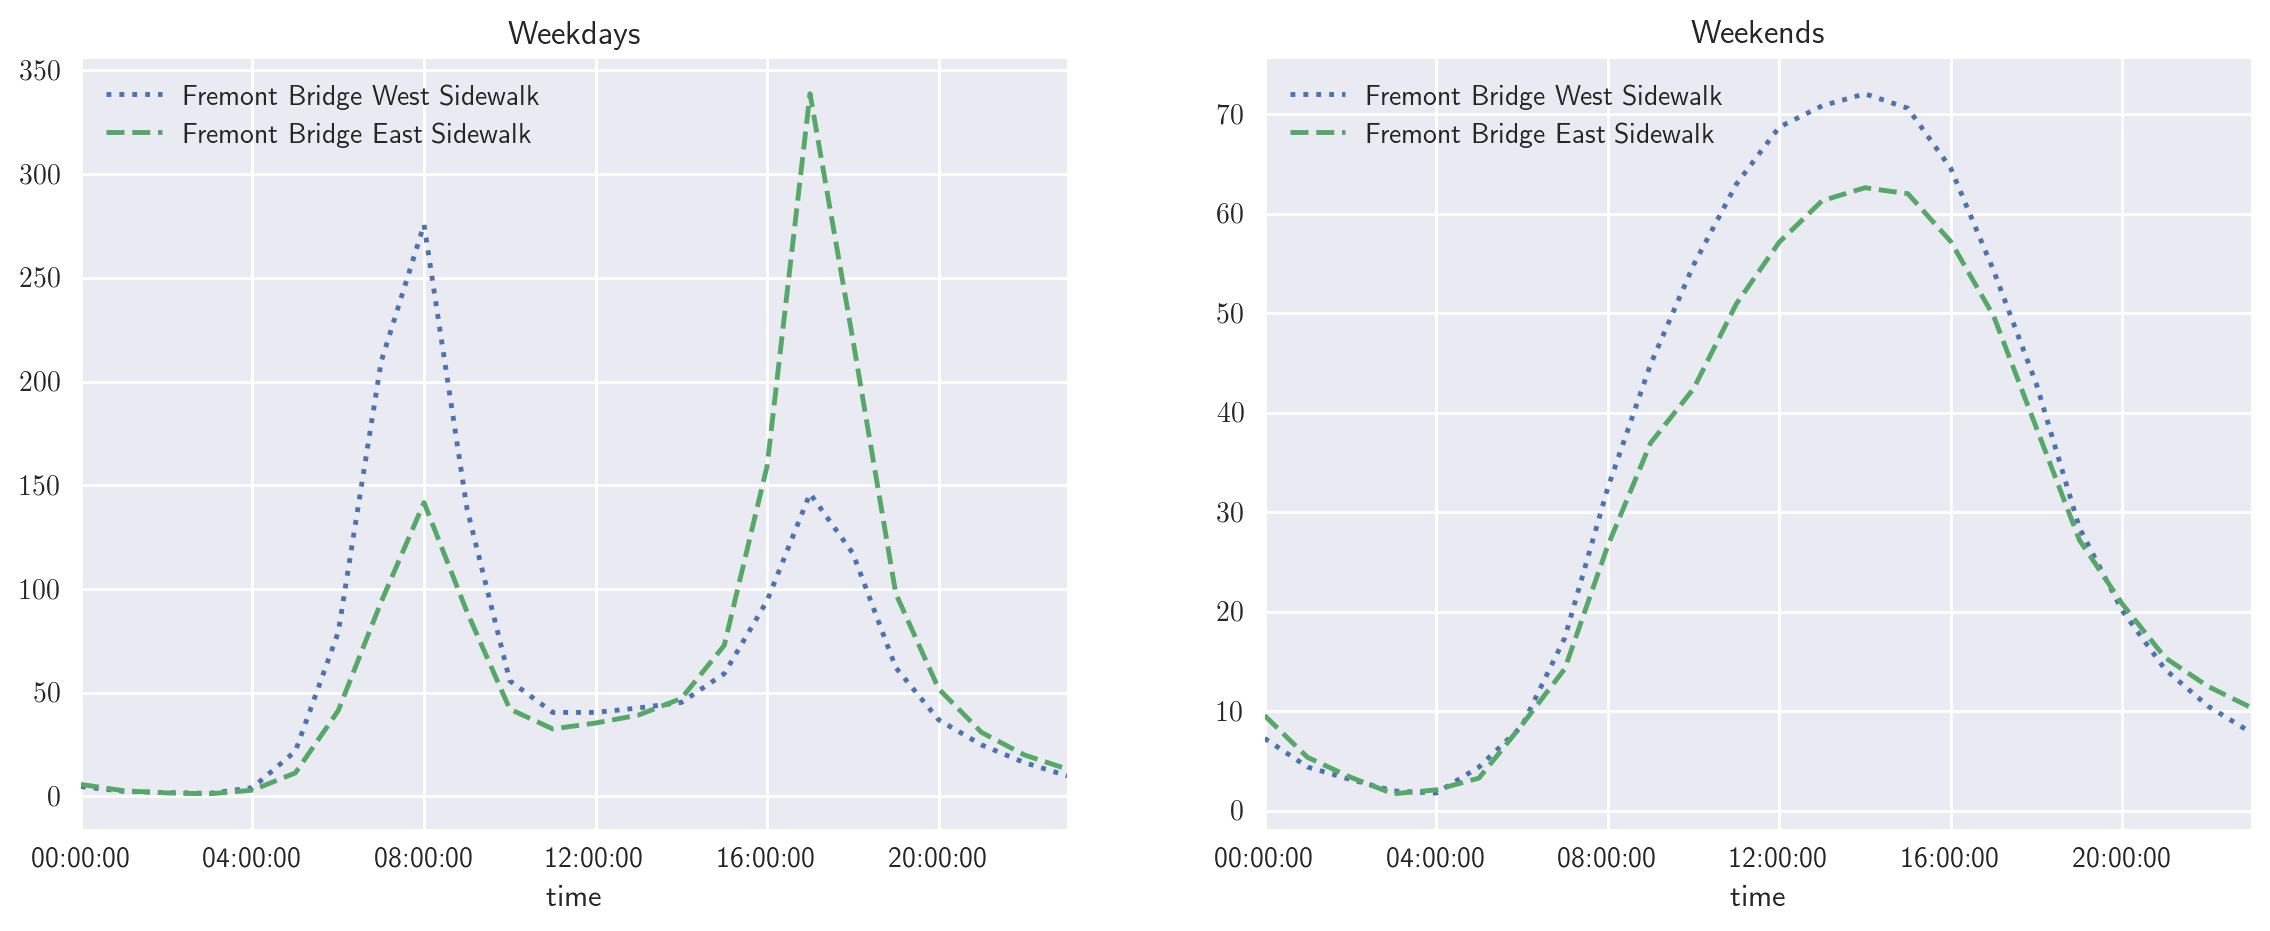

In [99]:
# that way we can see if bicycle traffic is different for 
# weekdays and weekends
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

## Violin Plots

Though this is not strictly a Pandas feature, it's definitely very easy to do a violin plot with pandas and seaborn. The same can be achieved with numpy and seaborn, but is more complicated.

In [100]:
# load the data set about tipping in the US
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


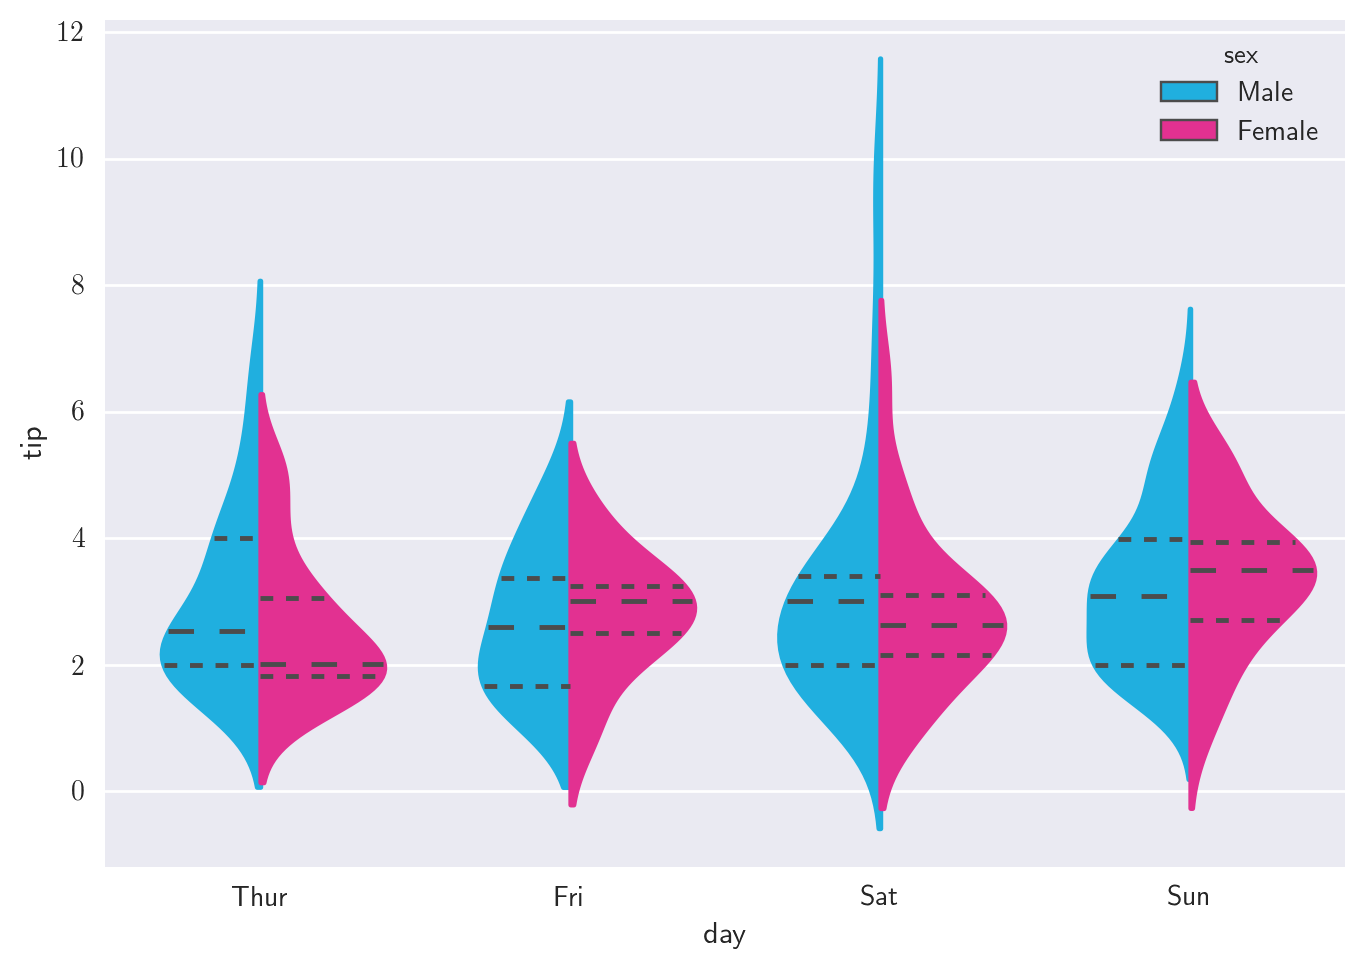

In [101]:
# now with seaborn and pandas it's very easy to see if tipping
# behavior depends on the sex and if there is a weekday variation
sns.violinplot(x="day", y="tip", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "DeepSkyBlue", "Female": "DeepPink"})